# Event-based Attention (Camille et al, 2024)
This notebook contains an implementation of the event-based saliency algorithm by Camille et al. <br>
*Chane, C.S., Niebur, E., Benosman, R. and Ieng, S.H., 2024. An event-based implementation of saliency-based visual attention for rapid scene analysis. arXiv preprint arXiv:2401.05030.* <br>

Akwasi Akwaboah (July 08, 2024)

The saliency model

$$ S_{u,v}(x,y,t) = \Sigma_i{\frac{\mathbb{1}_\sigma (x_i, y_i, t_i)}{(1+2r_v)}}$$

$$\sigma = \{ e_i \bigg\vert |x-x_i| + |y-y_i| \leq r_u \text{ and } t-t_i\leq t_u\}$$

$$ \mathbb{1}_\sigma =  \begin{cases} 
1 & \text{if } (x_i, y_i, t_i) \in \sigma \geq 0, \\
0 & \text{otherwise }
\end{cases} $$

At Multiple spatial and temporal pyramidal scales

Space: $$r_v \in \{2^v\}_{0\leq v \leq \lambda}$$
Time: $$t_u \in \{10\times 2^u\}_{0\leq u \leq \tau}$$

Spatiotemporal Saliency:

$$ S_{ST} (x,y,t) = \frac{1}{ST_{max}}\sum_{u=0}^\tau \sum_{v=0}^\lambda S_{u,v}(x,y,t)$$


Load Test data

In [1]:
import numpy as np
# import multiprocessing as mp
import matplotlib.pyplot as plt
import event_stream
import matplotlib
import matplotlib.animation
import IPython.display
from utils import evSal

Load sample data. This data shows a constellation of stars and an unknown object moving counter the directions of the stars

In [2]:
data_path = './data/events.es'

#other trial dataset
# import urllib.request

# Download the sample data from Github (55 MB)
# data_path, _ = urllib.request.urlretrieve(
#     "https://github.com/neuromorphicsystems/tutorials/raw/main/data/stars.es",
#     "stars.es",
# )

# base_url = "https://github.com/neuromorphicsystems/tutorials/raw/main/data"
# data_path, _ = urllib.request.urlretrieve(f"{base_url}/strange_horses.es", "strange_horses.es")

In [3]:
decoder = event_stream.Decoder(data_path)
events = np.concatenate([chunk for chunk in decoder])
events = events.view(dtype=events.dtype.descr[:3] + [(('on', 'p'), '?')])
events['y'] = decoder.height - 1 - events['y']

In [4]:
# events = events[-30000 : ]

In [5]:
print('events start at', events['t'][0], 'and end at', events['t'][-1])
print('events count:', events.shape[0])
print('unique timestamps:', np.unique(events['t']).shape[0])

events start at 0 and end at 29999675
events count: 341543
unique timestamps: 337434


In [6]:
evSal_obj = evSal(height=decoder.width, width=decoder.height, tau=5, lmbda=5, events=events)

grouping events by time...
337434


In [7]:
ln = len(evSal_obj.timeKeys)
eps = 1000

starts = [(ln//4) - eps, (ln//2) - eps, (3*ln//4) - eps]
ends = [(ln//4) + eps, (ln//2) + eps, (3*ln//4) + eps]

salMaps_case = []

for i in range(len(starts)):
    print(f'Generating saliency maps for case {i+1}...')
    for j in range(starts[i], ends[i]):
        evSal_obj.computeSalMap(trig_event=events[j])
    evSal_obj.normalizeSalMap()
    salMaps_case.append(evSal_obj.salMapTop)
    evSal_obj.clearSalMap() #clear the saliency maps for the next case

Generating saliency maps for case 1...


Below is the result of the multiscale spatiotemporal saliency run on the star data. It can be observed that brighter stars are more salient as shown in the video that follows. The background noise are also significantly reduced.

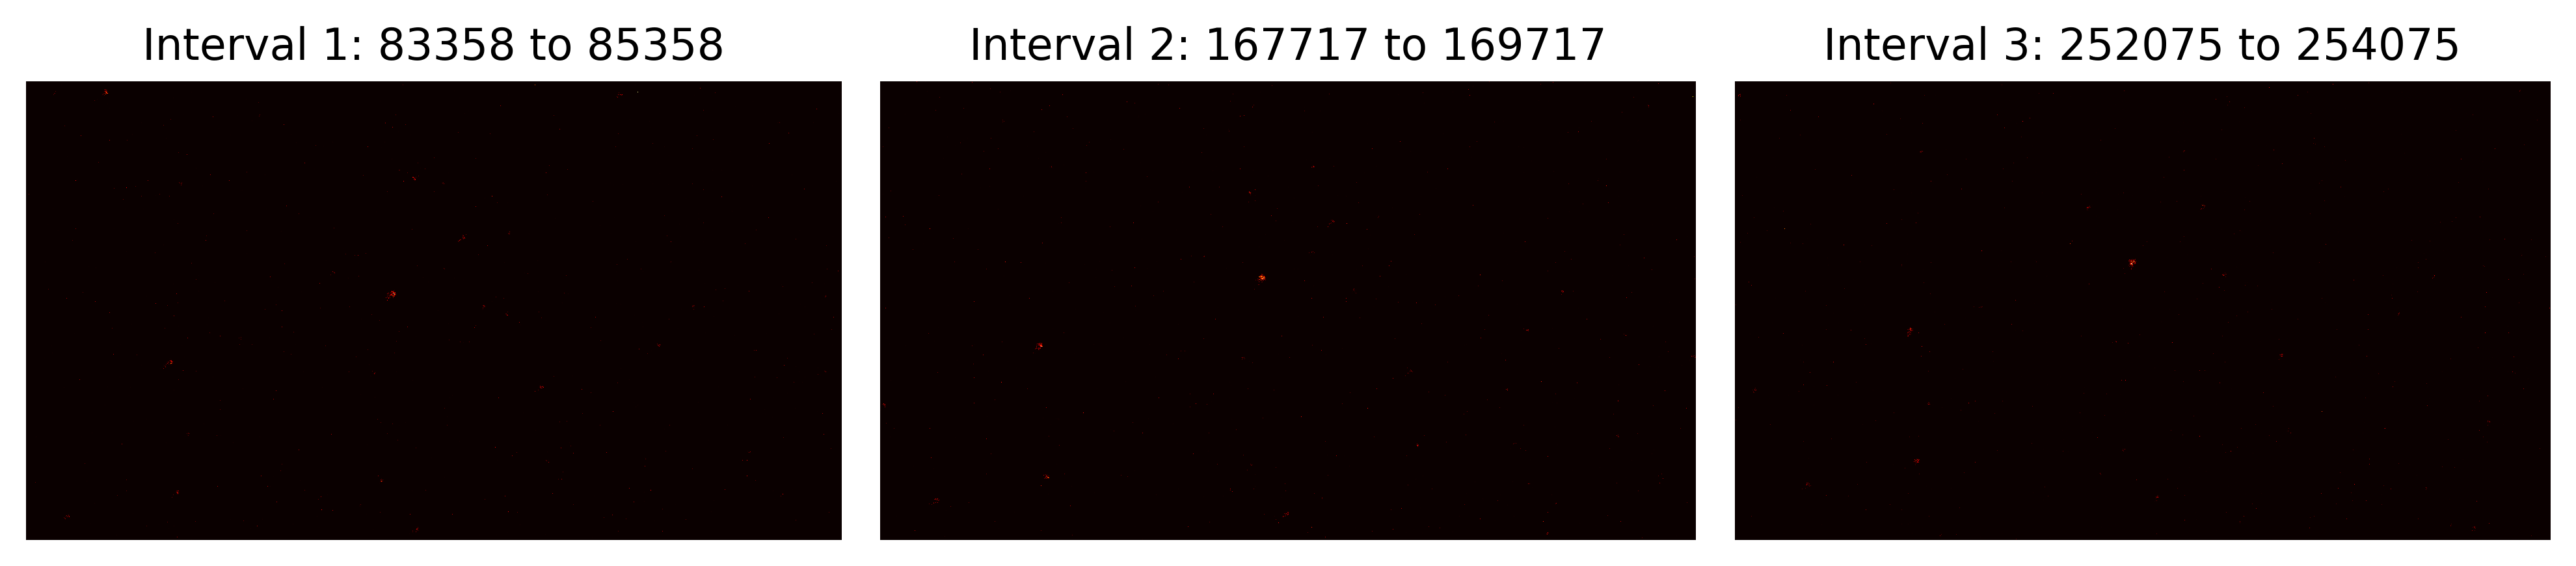

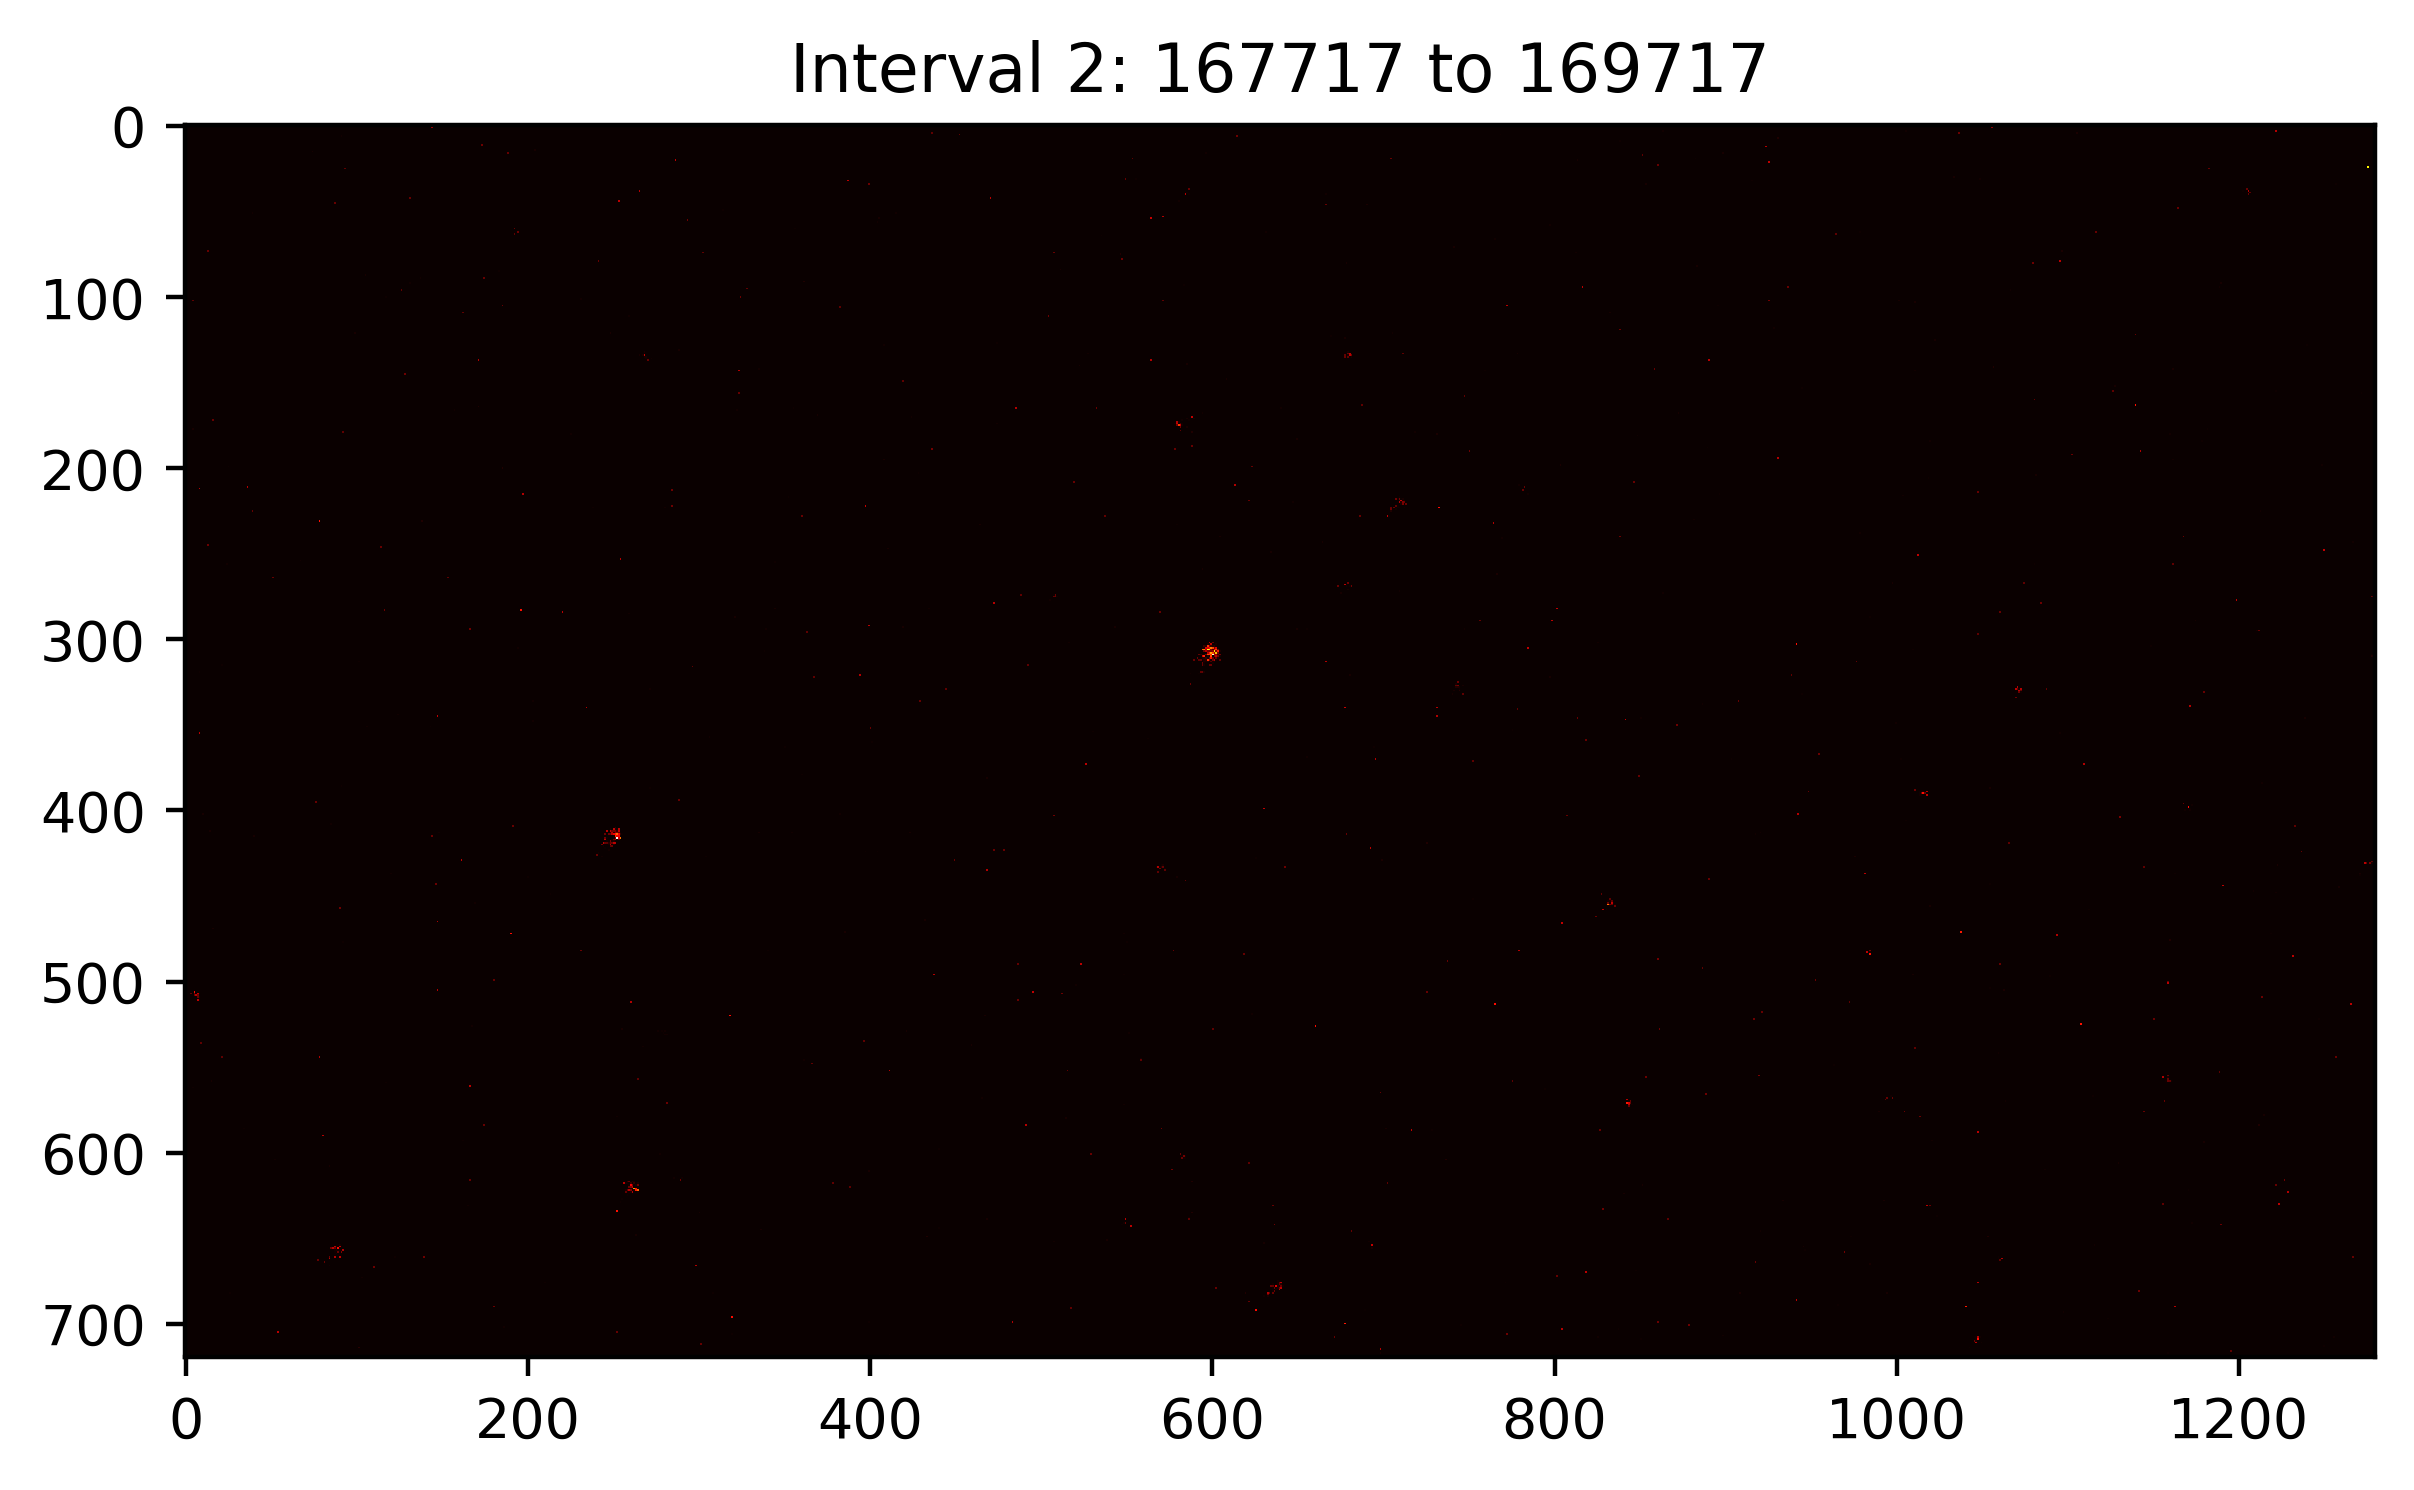

In [ ]:
plt.figure(figsize=(10, 4), dpi=400)

for i in range(3):
    plt.subplot(131+i)
    plt.imshow(salMaps_case[i].T, cmap='hot', interpolation='nearest')
    plt.title(f'Interval {i+1}: {starts[i]} to {ends[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4), dpi=400)
plt.imshow(salMaps_case[1].T, cmap='hot', interpolation='nearest')
plt.title(f'Interval {1+1}: {starts[1]} to {ends[1]}')
plt.show()

In [ ]:
from IPython.display import Video

video_path = './events-b0-e29.999676-video-1x.mp4'
video = Video(video_path)
video

